In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

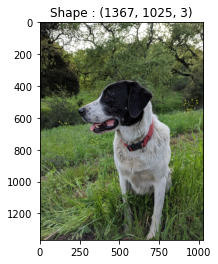

In [8]:
full = cv2.imread("DATA/sammy.jpg")
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

plt.title("Shape : {}".format(full.shape))
plt.imshow(full)
plt.show()

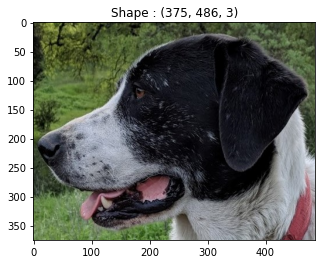

In [7]:
face = cv2.imread("DATA/sammy_face.jpg")
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

plt.title("Shape : {}".format(face.shape))
plt.imshow(face)
plt.show()

In [10]:
mystring = "sumasda"
eval(mystring)

NameError: name 'sumasda' is not defined

In [20]:
# farka bak diye

mystring = "sum"
myfunc = eval(mystring)
myfunc((2,3,4))

9

In [21]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 
           'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

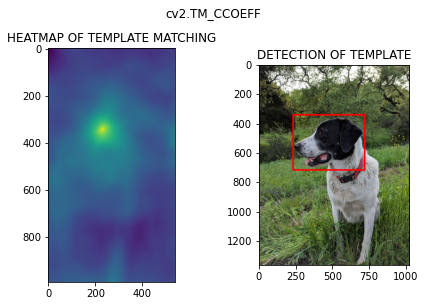

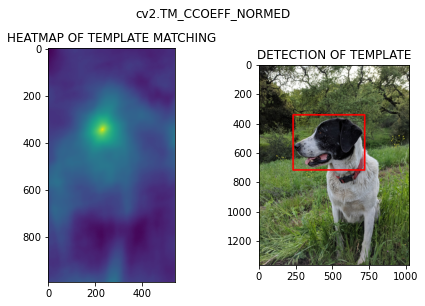

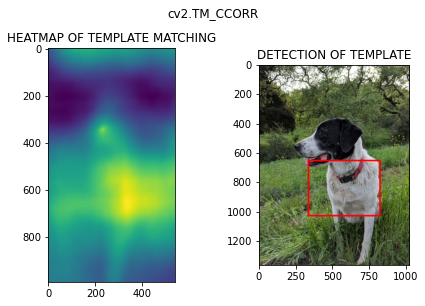

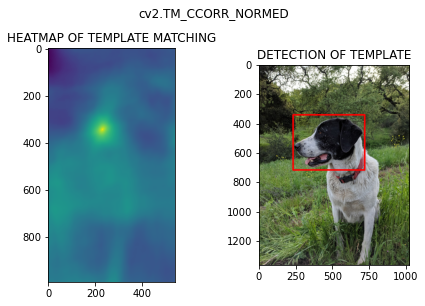

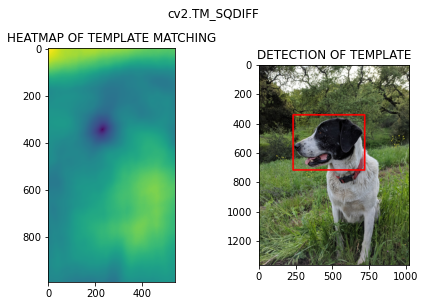

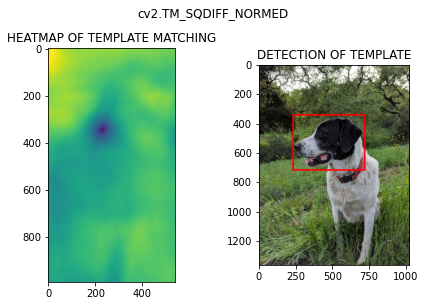

In [44]:
for m in methods:
    
    # Create A Copy
    
    full_copy = full.copy()
    
    method = eval(m)
    
    res = cv2.matchTemplate(full_copy,face,method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        
        top_left = min_loc # (x,y)
        
    else:
        
        top_left = max_loc
        
        
    height,width,channels = face.shape
    
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    plt.subplot(1,2,1)
    plt.imshow(res)
    plt.title("HEATMAP OF TEMPLATE MATCHING")
    
    plt.subplot(1,2,2)
    plt.imshow(full_copy)
    plt.title("DETECTION OF TEMPLATE")
    
    plt.suptitle(m, y = 1.05)
    
    plt.tight_layout()
    plt.show()
    
    print()
    print()

---

In [103]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

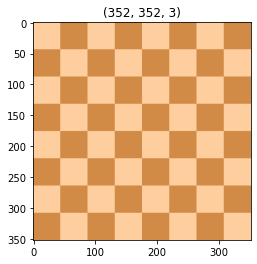

In [104]:
flat_chess = cv2.imread("DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

plt.title(flat_chess.shape)
plt.imshow(flat_chess)
plt.show()

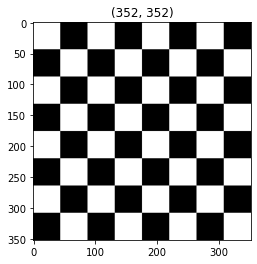

In [105]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)

plt.title(gray_flat_chess.shape)
plt.imshow(gray_flat_chess,cmap = "gray")
plt.show()

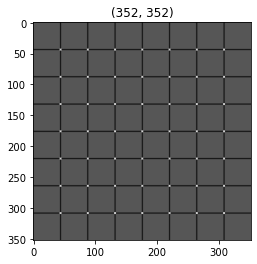

In [107]:
gray = np.float32(gray_flat_chess)

dst = cv2.cornerHarris(gray,blockSize =2,ksize= 3, k = 0.04)

plt.title(dst.shape)
plt.imshow(dst,cmap = "gray")
plt.show()

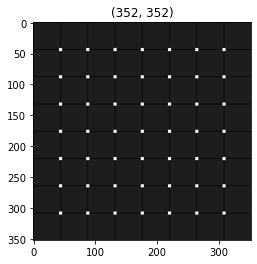

In [108]:
dst = cv2.dilate(dst,None)

plt.title(dst.shape)
plt.imshow(dst,cmap = "gray")
plt.show()

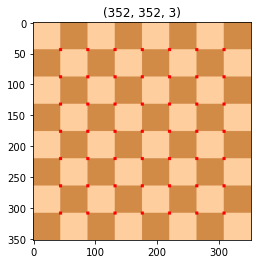

In [109]:
flat_chess[dst>0.01*dst.max()] = [255,0,0]

plt.title(flat_chess.shape)
plt.imshow(flat_chess,cmap = "gray")
plt.show()

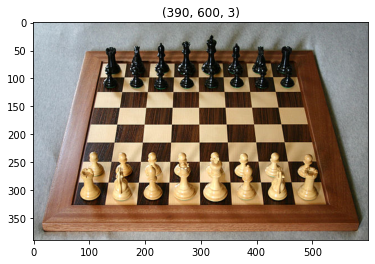

In [110]:
real_chess = cv2.imread("DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

plt.title(real_chess.shape)
plt.imshow(real_chess,cmap = "gray")
plt.show()

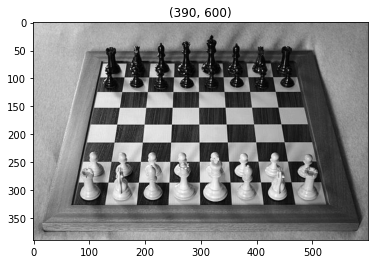

In [111]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)

plt.title(gray_real_chess.shape)
plt.imshow(gray_real_chess,cmap = "gray")
plt.show()

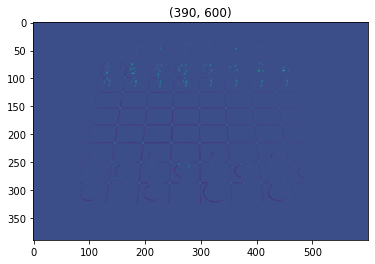

In [112]:
gray = np.float32(gray_real_chess)

dst = cv2.cornerHarris(gray,blockSize = 2, ksize = 3, k = 0.04)

plt.title(dst.shape)
plt.imshow(dst)
plt.show()

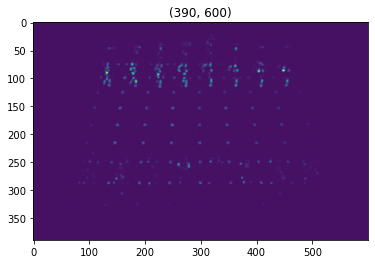

In [113]:
dst = cv2.dilate(dst,None)
plt.title(dst.shape)
plt.imshow(dst)
plt.show()

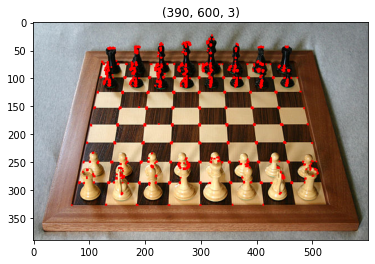

In [114]:
real_chess[dst>0.01*dst.max()] = [255,0,0]

plt.title(real_chess.shape)
plt.imshow(real_chess)
plt.show()

---

In [122]:
flat_chess = cv2.imread("DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

real_chess = cv2.imread("DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)

In [147]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,5,0.01,10)
corners

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]]], dtype=float32)

In [148]:
for i in corners:
    print(i.ravel())

[308. 308.]
[264. 308.]
[220. 308.]
[176. 308.]
[132. 308.]


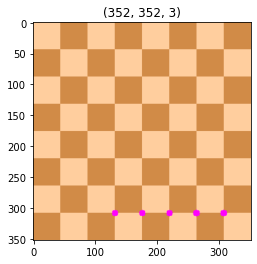

In [149]:
for i in corners:
    
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),5,(255,0,255),-1)
    
plt.title(flat_chess.shape)
plt.imshow(flat_chess)
plt.show()

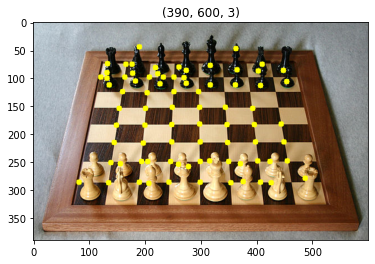

In [151]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),5,(255,255,0),-1)
    
plt.title(real_chess.shape)
plt.imshow(real_chess)
plt.show()

---

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [164]:
img = cv2.imread("DATA/sammy_face.jpg")

def display(image,cmap = None):
    
    plt.title("Shape : {}".format(image.shape))
    plt.imshow(image,cmap = cmap)
    plt.show()

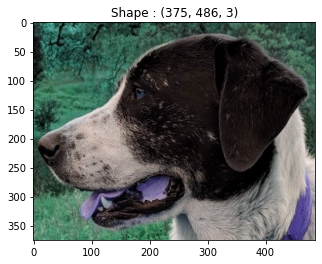

In [165]:
display(img)

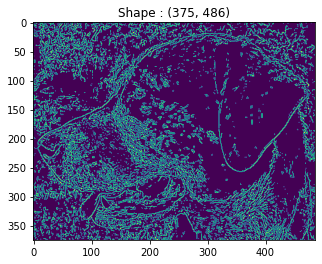

In [166]:
edges1 = cv2.Canny(img,threshold1 = 127,threshold2 = 127)
display(edges1)

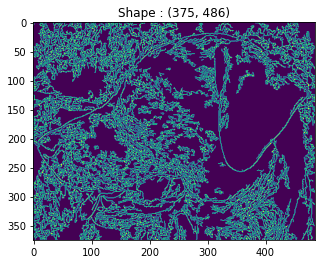

In [167]:
edges2 = cv2.Canny(img,threshold1 = 0,threshold2 = 255)
display(edges2)

In [168]:
med_val = np.median(img)
med_val

64.0

In [171]:
lower = int(max(0,0.7*med_val))
upper = int(min(255,1.3*med_val))

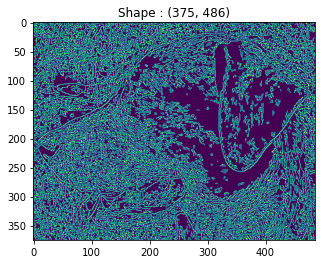

In [172]:
edges3 = cv2.Canny(img,threshold1 = lower,threshold2 = upper)
display(edges3)

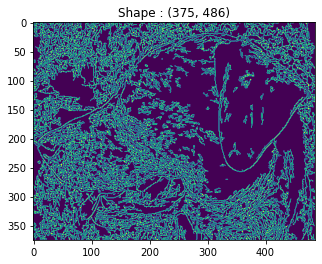

In [173]:
edges4 = cv2.Canny(img,threshold1 = lower,threshold2 = upper+100)
display(edges4)

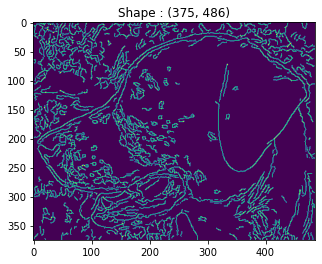

In [174]:
blur_img = cv2.blur(img,ksize = (5,5))

edges5 = cv2.Canny(blur_img,threshold1=lower,threshold2=upper)

display(edges5)

---

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [ ]:
def display(image,cmap = None):
    
    plt.title("Shape : {}".format(image.shape))
    plt.imshow(image,cmap = cmap)
    plt.show()

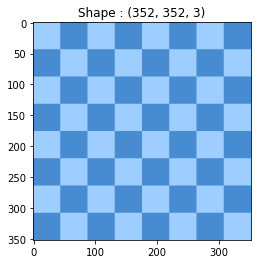

In [176]:
flat_chess = cv2.imread("DATA/flat_chessboard.png")

display(flat_chess)

In [177]:
found,corners = cv2.findChessboardCorners(flat_chess,(7,7))
found

True

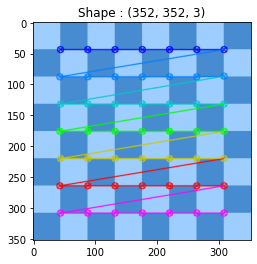

In [181]:
display(cv2.drawChessboardCorners(flat_chess,(7,7),corners,found))

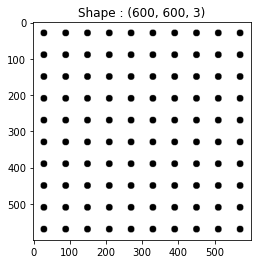

In [191]:
dots = cv2.imread("DATA/dot_grid.png")

display(dots)

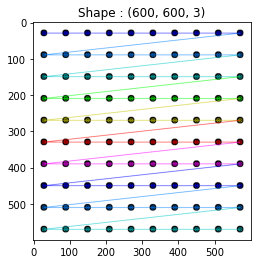

In [192]:
found,corners = cv2.findCirclesGrid(dots,(10,10),cv2.CALIB_CB_SYMMETRIC_GRID)

display(cv2.drawChessboardCorners(dots,(10,10),corners,found))

----

In [193]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

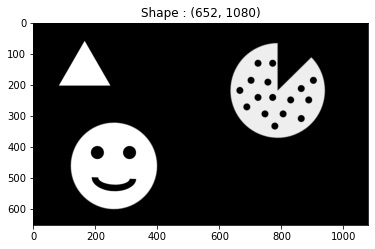

In [196]:
img = cv2.imread("DATA/internal_external.png",0)

def display(image,cmap = None):
    
    plt.title("Shape : {}".format(image.shape))
    plt.imshow(image,cmap = cmap)
    plt.show()

display(img,"gray")

In [199]:
contours, hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [207]:
type(contours),type(hierarchy),len(contours),hierarchy.shape

(list, numpy.ndarray, 22, (1, 22, 4))

In [201]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

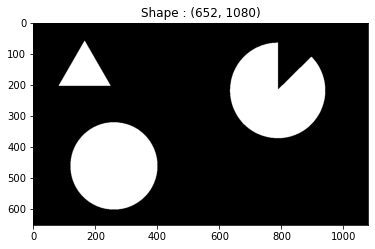

In [209]:
external_contours = np.zeros(img.shape)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        
        cv2.drawContours(external_contours,contours,i,255,-1)
        
display(external_contours,"gray")

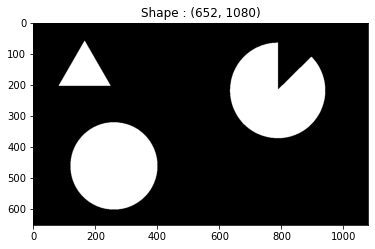

In [215]:
external_contours = np.zeros(img.shape)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        
        cv2.drawContours(external_contours,contours,i,255,-1)
        
display(external_contours,"gray")

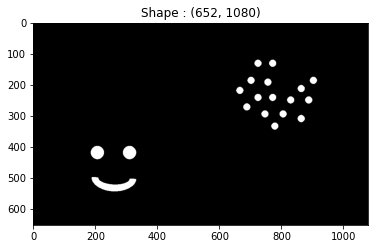

In [216]:
internal_contours = np.zeros(img.shape)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] != -1:
        
        cv2.drawContours(internal_contours,contours,i,255,-1)
        
display(internal_contours,"gray")

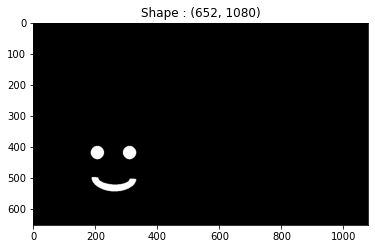

In [218]:
internal_contours = np.zeros(img.shape)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == 0:
        
        cv2.drawContours(internal_contours,contours,i,255,-1)
        
display(internal_contours,"gray")

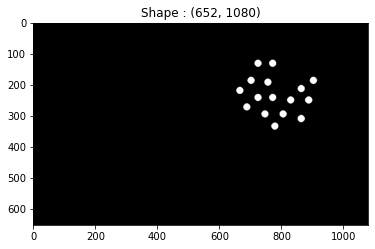

In [219]:
internal_contours = np.zeros(img.shape)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == 4:
        
        cv2.drawContours(internal_contours,contours,i,255,-1)
        
display(internal_contours,"gray")

---

In [220]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
def display(image,cmap = "gray"):
    
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    size = 15
    ax.set_title(f"Shape : {image.shape}",fontsize = size)
    ax.imshow(image,cmap = cmap)
    plt.show()

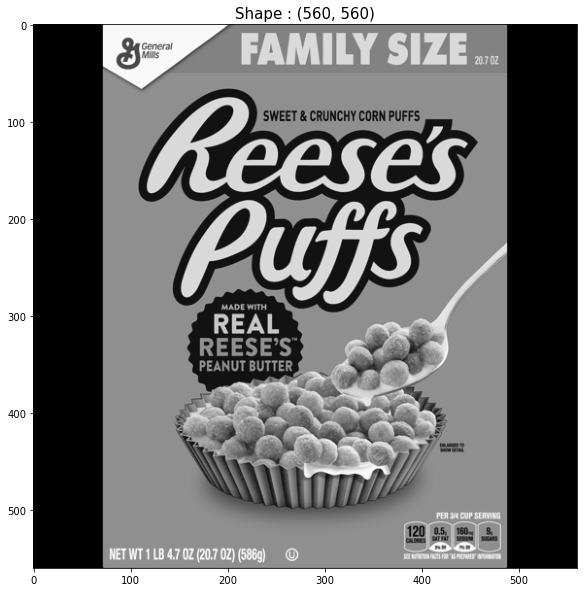

In [227]:
reeses = cv2.imread("DATA/reeses_puffs.png",0)
cereals = cv2.imread("DATA/many_cereals.jpg",0)

display(reeses)

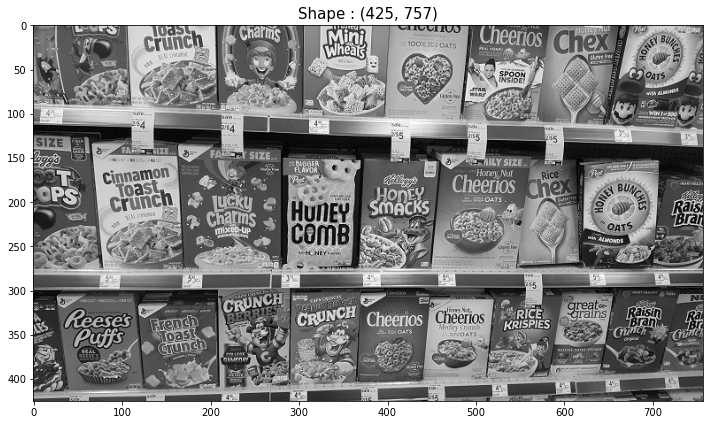

In [228]:
display(cereals)

# Brute Force Detection With ORB Descriptors

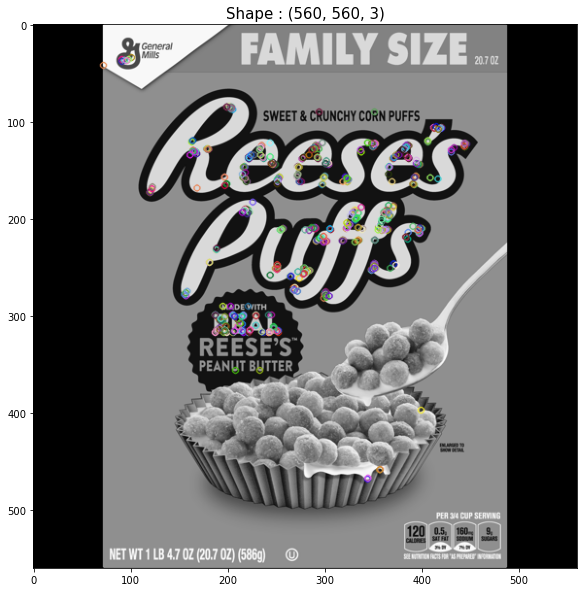

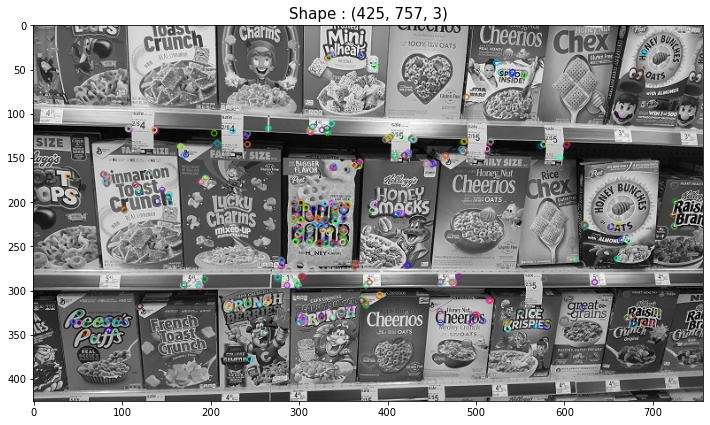

(None, None)

In [248]:
orb = cv2.ORB_create()

kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

img_kp1 = cv2.drawKeypoints(reeses,kp1,None)
img_kp2 = cv2.drawKeypoints(cereals,kp2,None)

display(img_kp1),display(img_kp2)

In [250]:
# Default değer 500
# Burda 500 tane features bulmaya çalışıyor ve hepsi 32 array sahip !!!
# 32 ise her bir descriptor'un array karşılığı
des1.shape,des2.shape,des1[0]


((500, 32),
 (500, 32),
 array([  9, 219, 135, 183,  50, 138,  41, 180,  36,  65,  66, 229, 189,
        134, 144, 228,  38, 109,  62, 204, 195, 216,  39, 109, 132, 227,
        250, 192,  46, 134,  33, 121], dtype=uint8))

In [266]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1,des2)
matches = sorted(matches,key = lambda x : x.distance)
len(matches)

138

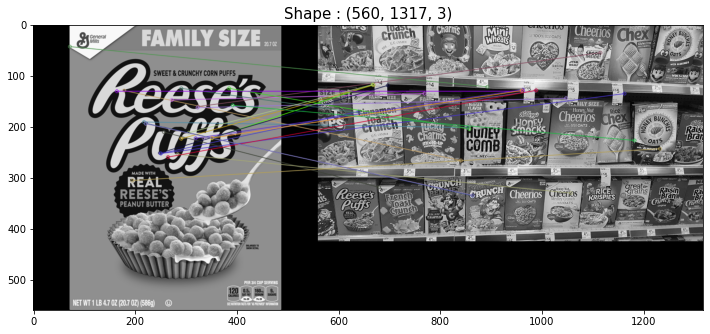

In [267]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_matches)

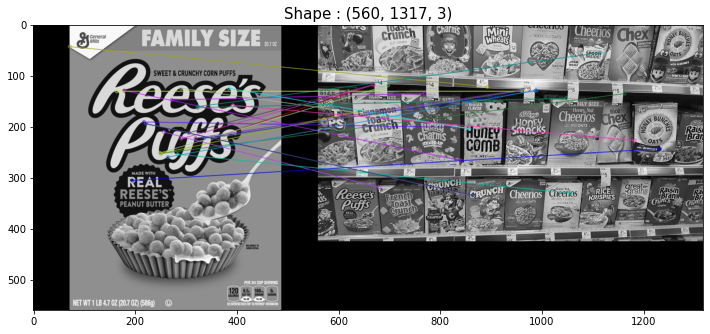

In [268]:
orb = cv2.ORB_create()

kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)

matches = bf.match(des1,des2)

matches = sorted(matches,key = lambda x : x.distance)

reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags = 2)

display(reeses_matches)

# Brute-Force Matching with SIFT Descriptors and Ratio Test

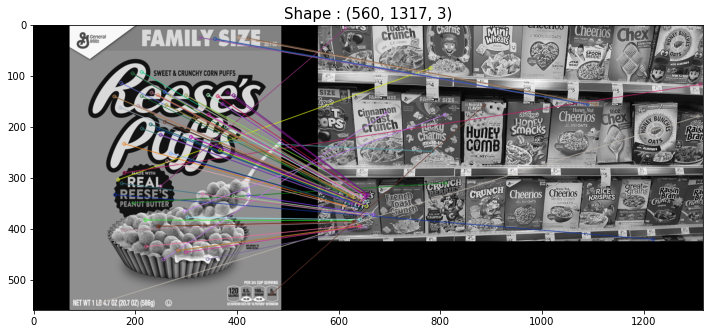

In [274]:
sift = cv2.SIFT_create()

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])
        
shift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(shift_matches)

# FLANN based Matcher

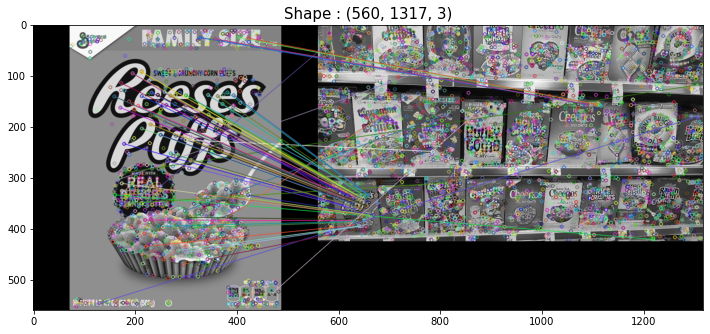

In [278]:
sift = cv2.SIFT_create()

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

for i,(match1,match2) in enumerate(matches):
    
    if match1.distance < 0.75*match2.distance:
        good.append([match1])
        
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags = 0)

display(flann_matches)

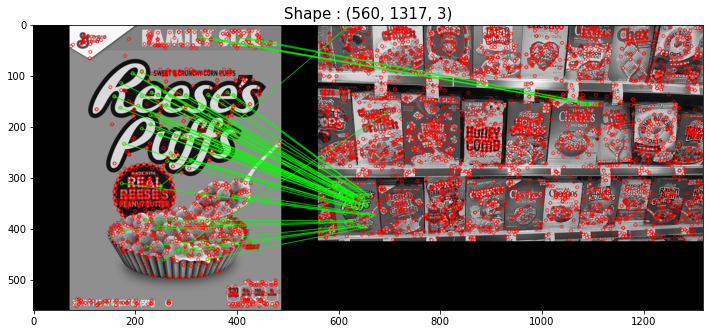

In [282]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

display(flann_matches)

---

In [283]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [293]:
def display(image,cmap = "gray"):
    
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.set_title(f"Shape : {image.shape}")
    ax.imshow(image,cmap = cmap)
    plt.show()

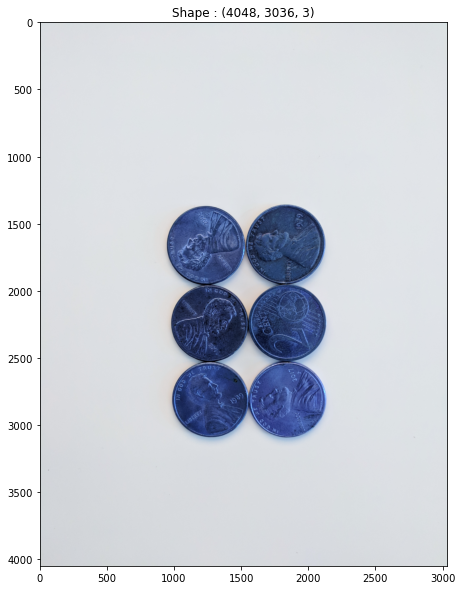

In [294]:
img = cv2.imread("DATA/pennies.jpg")
display(img)

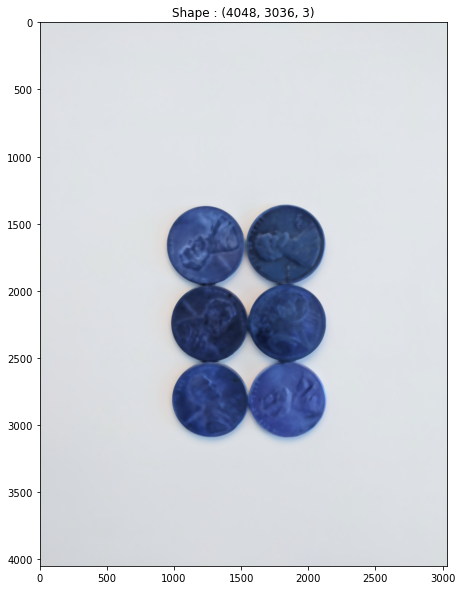

In [295]:
blur_img = cv2.medianBlur(img,25)
display(blur_img)

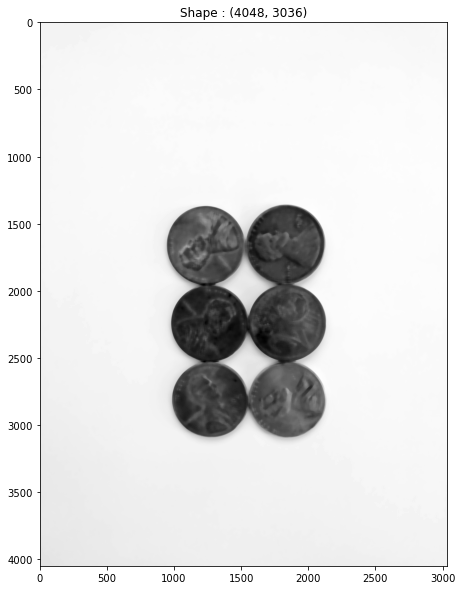

In [296]:
gray_img = cv2.cvtColor(blur_img,cv2.COLOR_BGR2GRAY)
display(gray_img)

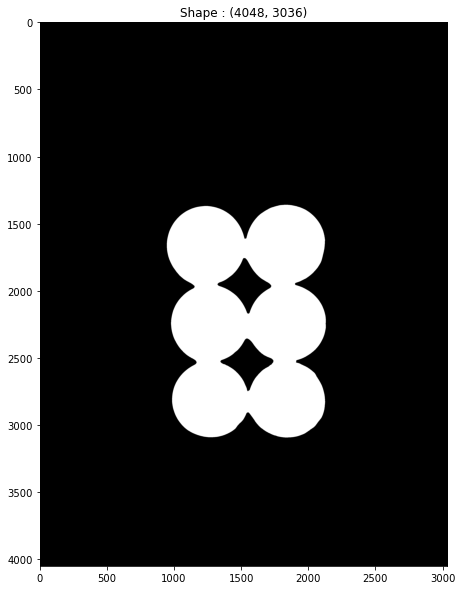

In [297]:
ret,thresh = cv2.threshold(gray_img,160,255,cv2.THRESH_BINARY_INV)
display(thresh)

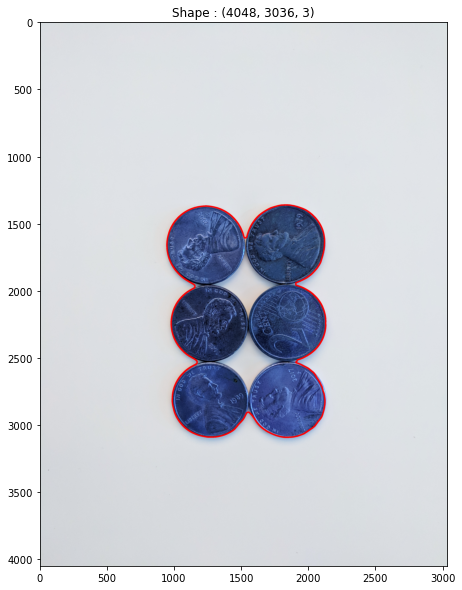

In [325]:
contours,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        
        cv2.drawContours(img,contours,i,(255,0,0),10)
        
display(img)

## 

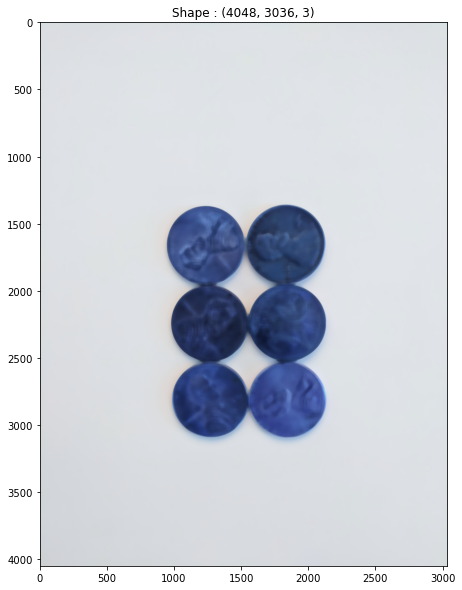

In [326]:
img = cv2.imread("DATA/pennies.jpg")
blur_img = cv2.medianBlur(img,35)
display(blur_img)

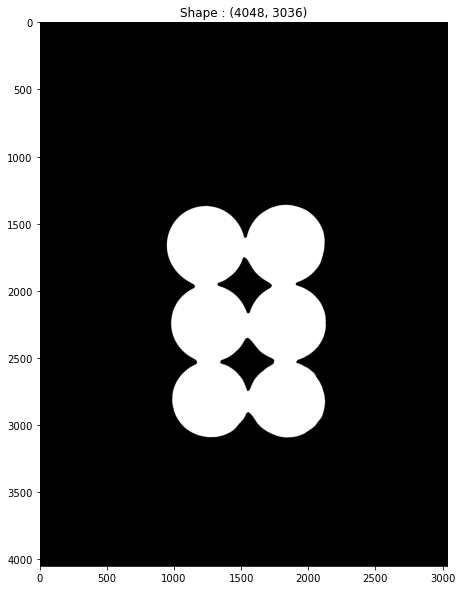

In [327]:
gray_img = cv2.cvtColor(blur_img,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#ret,thresh = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY_INV)

display(thresh)

In [328]:
# NOISE REMOVEL(OPTINAL)

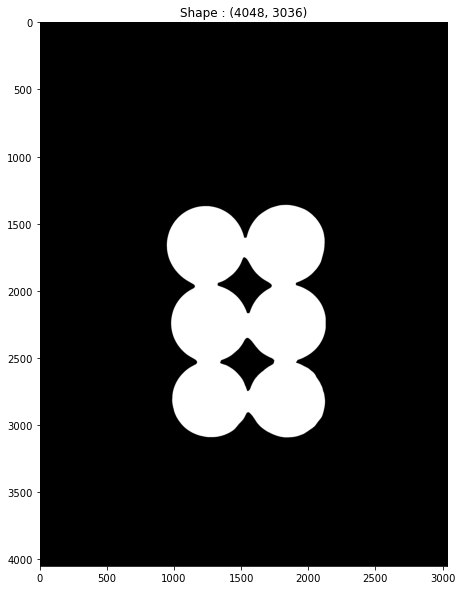

In [329]:
kernel = np.ones((3,3),np.uint8)

opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 10)
display(opening)

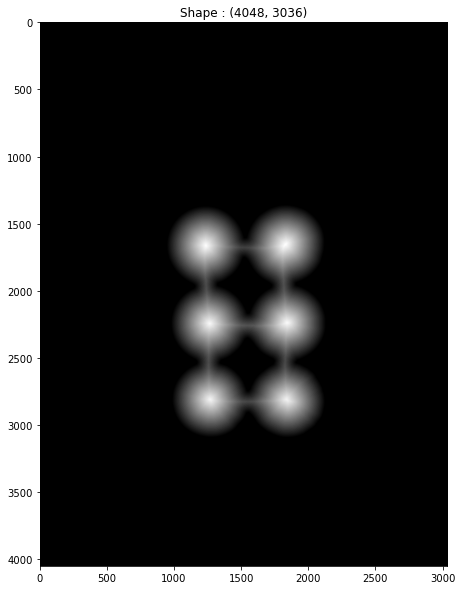

In [330]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
display(dist_transform)

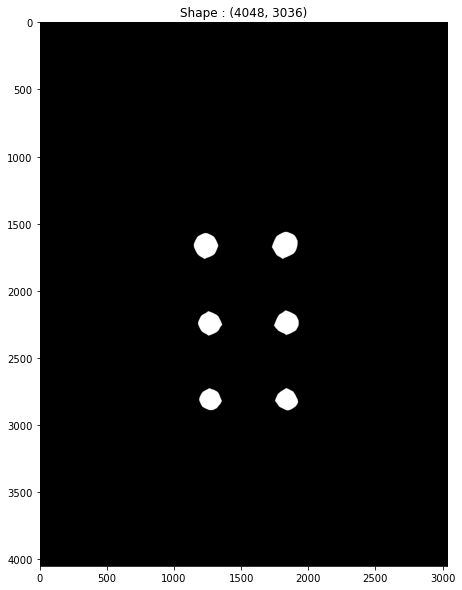

In [331]:
ret1,thresh1 = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
display(thresh1)

In [332]:
thresh1.max(),thresh1.min()

(255.0, 0.0)

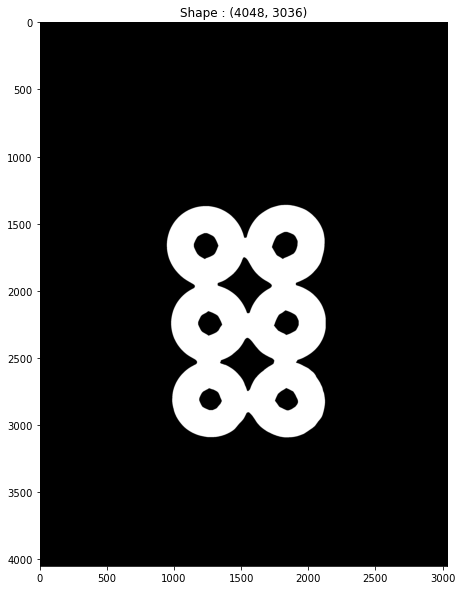

In [333]:
sure_fg = np.uint8(thresh1)

unknown = cv2.subtract(opening,sure_fg)
display(unknown)

In [334]:
ret, markers = cv2.connectedComponents(sure_fg)

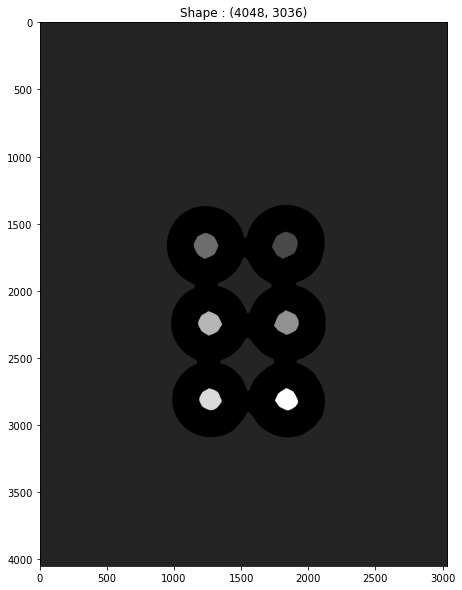

In [335]:
markers = markers + 1
markers[unknown == 255] = 0
display(markers)

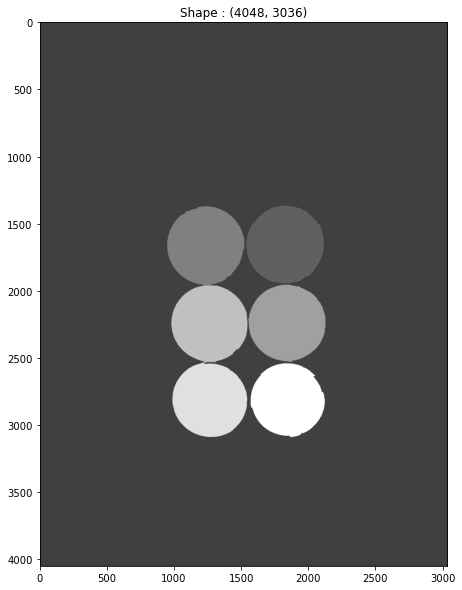

In [336]:
markers = cv2.watershed(img,markers)
display(markers)

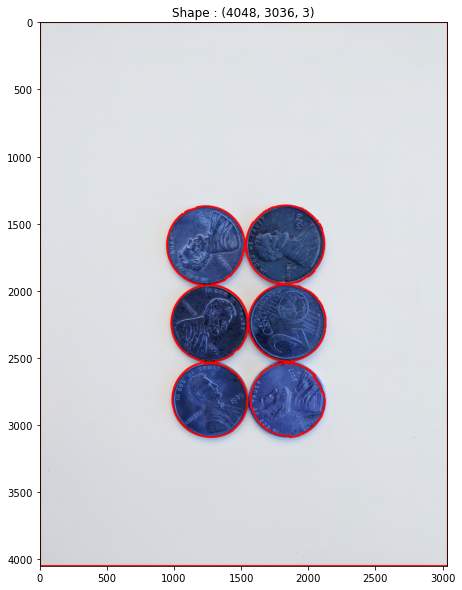

In [337]:
contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        
        cv2.drawContours(img,contours,i,(255,0,0),10)
        
display(img)

## 